In [11]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet

# Load Dataset
2015-01-04 - 2018-03-25

In [2]:
df = pd.read_csv('avocado.csv')

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.info()

# Types

In [4]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


# Preprocess

In [5]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]

df['Date'] = pd.to_datetime(df['Date'])

data = df[['Date', 'AveragePrice']].reset_index(drop=True)

data = data.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

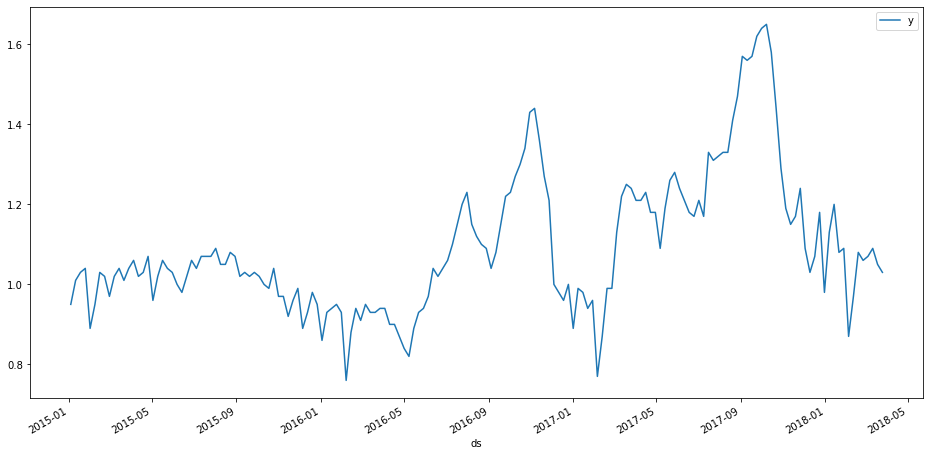

In [6]:
data.plot(x='ds', y='y', figsize=(16, 8))

# Fit

https://facebook.github.io/prophet/docs/quick_start.html

In [7]:
model = Prophet()

model.fit(data)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Predict

In [8]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.980810,1.244640,1.104660,1.236359,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.979511,1.238428,1.104040,1.236599,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.988656,1.251265,1.103419,1.236841,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.989474,1.251628,1.102877,1.237085,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.981125,1.242589,1.102502,1.237324,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


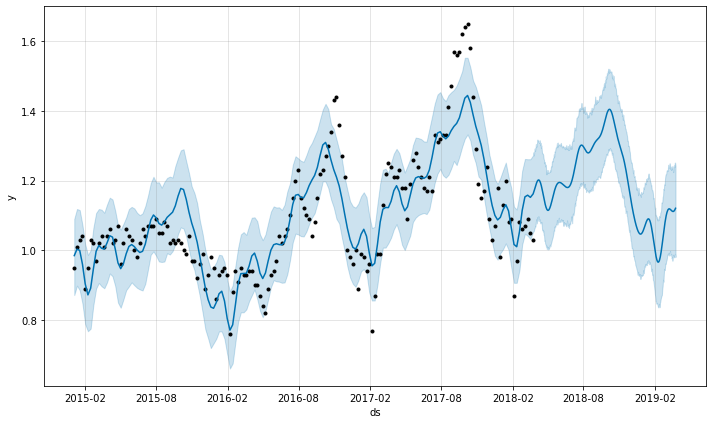

In [9]:
fig1 = model.plot(forecast)

# Components

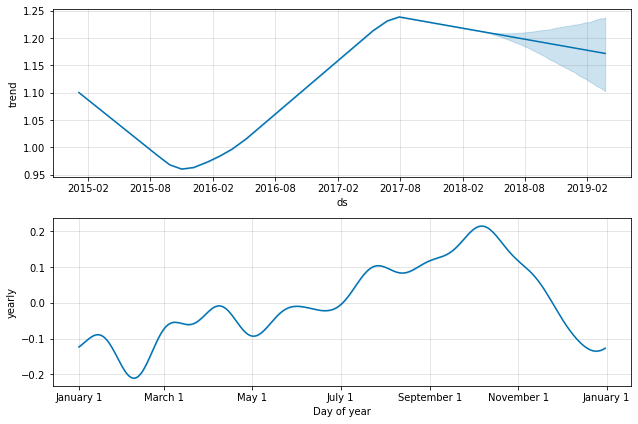

In [10]:
fig2 = model.plot_components(forecast)